In [12]:
import matplotlib.pyplot as plt                                    
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind_from_stats
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns

### Reading the Dataset

In [3]:

GDPdata = pd.read_excel('GDP.xls',sheet_name = 'Data', skiprows = 3)
GDPmdata1 = pd.read_excel('GDP.xls',sheet_name = 'Metadata - Countries')

flightdata=pd.read_excel('passengers.xls',sheet_name = 'Data', skiprows = 3)
flightdata1 = pd.read_excel('passengers.xls',sheet_name = 'Metadata - Countries')


### Data processing 

In [6]:
combined_GDP = pd.merge(GDPdata,GDPmdata1 ,left_on=["Country Code"], right_on = ["Country Code"])

combined_data1 = pd.melt(combined_GDP,id_vars=["Country Name","Country Code","Indicator Name","Indicator Code",
                                   "Region","IncomeGroup","SpecialNotes","TableName"],var_name = "years",value_name="GDP Values")
#dropping unwanted columns in GDP file 
combined_data1.drop(['Indicator Name','Indicator Code','SpecialNotes','TableName','IncomeGroup','Country Code','Region'], axis=1, inplace=True )

combined_flight = pd.merge(flightdata,flightdata1 ,left_on=["Country Code"], right_on = ["Country Code"])

combined_flight1 = pd.melt(combined_flight,id_vars=["Country Name","Country Code","Indicator Name","Indicator Code",
                                   "Region","IncomeGroup","SpecialNotes","TableName"],var_name = "years",value_name="passengers")
#dropping unwanted columns in GDP file 
combined_flight1.drop(['Indicator Name','Indicator Code','SpecialNotes','TableName','IncomeGroup','Country Code','Region'], axis=1, inplace=True )
combined_flight1

,Country Name,years,passengers
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN
...,...,...,...
16160,Kosovo,2020,NaN
16161,"Yemen, Rep.",2020,NaN
16162,South Africa,2020,NaN
16163,Zambia,2020,NaN


In [28]:
country = combined_data1.join(combined_flight1['passengers']) 
Rwanda = country[country['Country Name']=='Rwanda']  
Rwanda.dropna(inplace=True)

Rwanda['years']=Rwanda['years'].astype('float64')
Rwanda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 5767 to 15837
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  24 non-null     object 
 1   years         24 non-null     float64
 2   GDP Values    24 non-null     float64
 3   passengers    24 non-null     float64
dtypes: float64(3), object(1)
memory usage: 960.0+ bytes


<ipython-input-28-a03015015909>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rwanda.dropna(inplace=True)
<ipython-input-28-a03015015909>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rwanda['years']=Rwanda['years'].astype('float64')


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


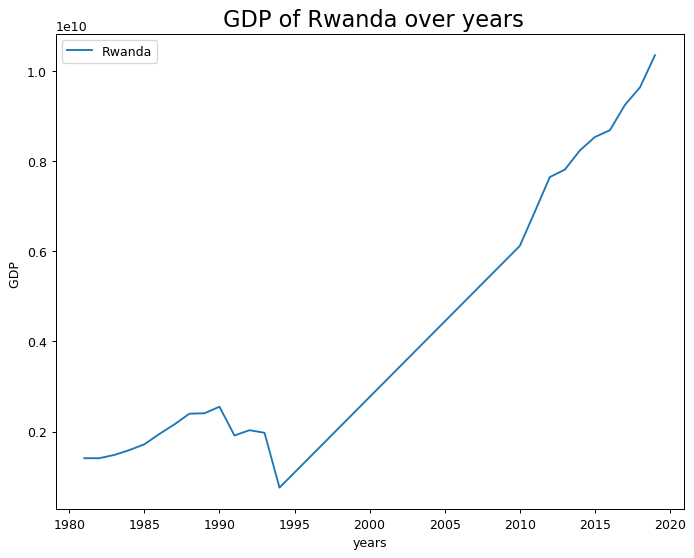

In [30]:

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':90})
          #


sns.lineplot(Rwanda['years'],Rwanda["GDP Values"],label='Rwanda')       
plt.title(' GDP of Rwanda over years',fontsize=18)
plt.xlabel('years')
plt.ylabel('GDP ')
plt.legend()
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


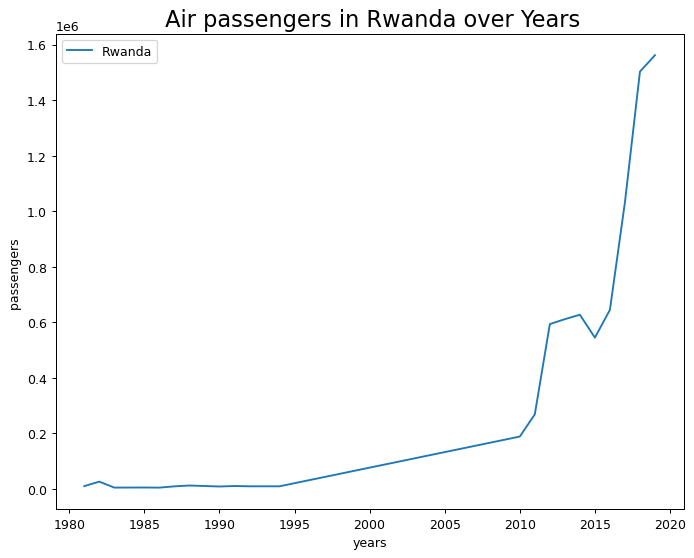

In [32]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':90})
          
sns.lineplot(Rwanda['years'],Rwanda["passengers"],label='Rwanda')       
plt.title(' Air passengers in Rwanda over Years',fontsize=18)
plt.xlabel('years')
plt.ylabel('passengers ')
plt.legend()
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


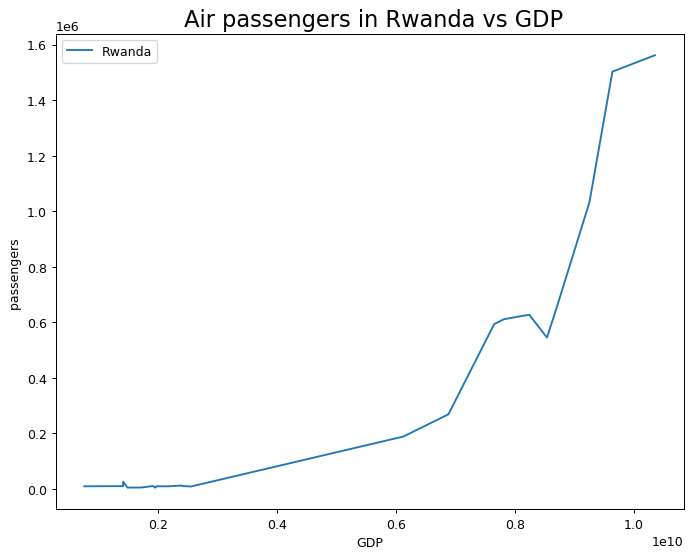

In [33]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':90})
          
sns.lineplot(Rwanda["GDP Values"],Rwanda["passengers"],label='Rwanda')       
plt.title(' Air passengers in Rwanda vs GDP',fontsize=18)
plt.xlabel('GDP')
plt.ylabel('passengers ')
plt.legend()
plt.show()

In [34]:
correlation = np.corrcoef(Rwanda["GDP Values"],Rwanda["passengers"]) 
print(f'The correlation coefficient is : ',correlation[1][0])
print('')


The correlation coefficient is :  0.8963122197234863



r_square: 0.7017510640692748


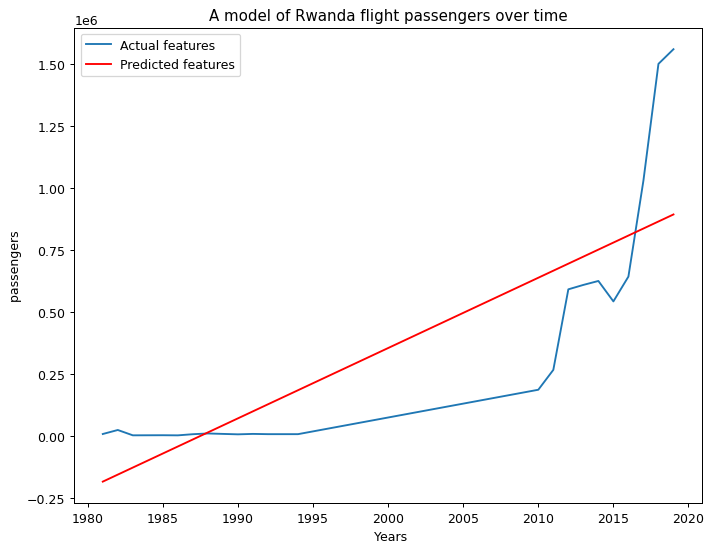

predicted number of  passengers in 2021 using time are:  [1065308.2074549]


In [39]:
#modal between date and passengers


X = np.array(Rwanda['years']).reshape(-1,1)
y = np.array(Rwanda["passengers"])        

model = LinearRegression()
model.fit(X,y)
model = LinearRegression().fit(X,y)
r_square = model.score(X,y)
print('r_square:',r_square)
y_predicted = model.intercept_ + model.coef_ * X

plt.plot(X,y,label='Actual features')
plt.plot(X,y_predicted,label='Predicted features',color='r')
plt.xlabel(' Years')
plt.ylabel(' passengers ')
plt.title('A model of Rwanda flight passengers over time')
plt.legend()
plt.show()
predicted_2025 = model.predict([[2025]])
print('predicted number of  passengers in 2021 using time are: ',predicted_2025 )   


r_square: 0.9381874956205559


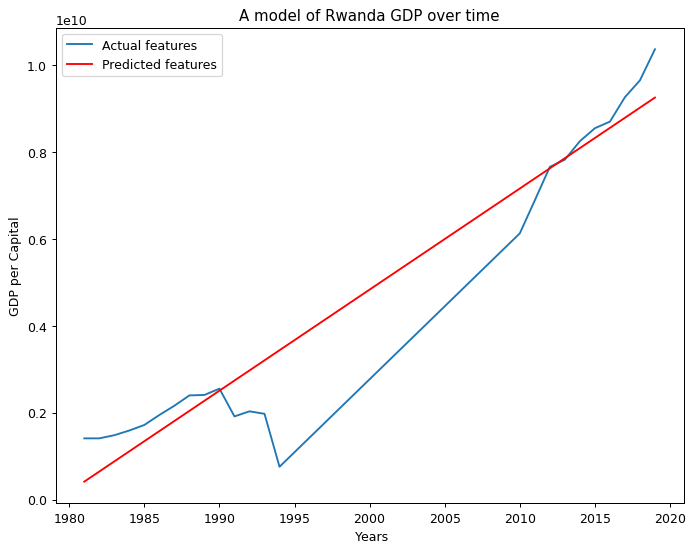

predicted number GDP in 2021 using time is:  [1.06389266e+10]


In [43]:
X = np.array(Rwanda['years']).reshape(-1,1)
y = np.array(Rwanda["GDP Values"])        #.reshape(-1,1)

model = LinearRegression()
model.fit(X,y)
model = LinearRegression().fit(X,y)
r_square= model.score(X,y)
print('r_square:', r_square)


y_predicted = model.intercept_ + model.coef_ * X

plt.plot(X,y,label='Actual features')
plt.plot(X,y_predicted,label='Predicted features',color='r')
plt.xlabel(' Years')
plt.ylabel(' GDP per Capital ')
plt.title('A model of Rwanda GDP over time')
plt.legend()
plt.show()
predicted_rate_2025 = model.predict([[2025]])
print('predicted number GDP in 2021 using time is: ',predicted_rate_2025)  

r_square: 0.8033755952256432


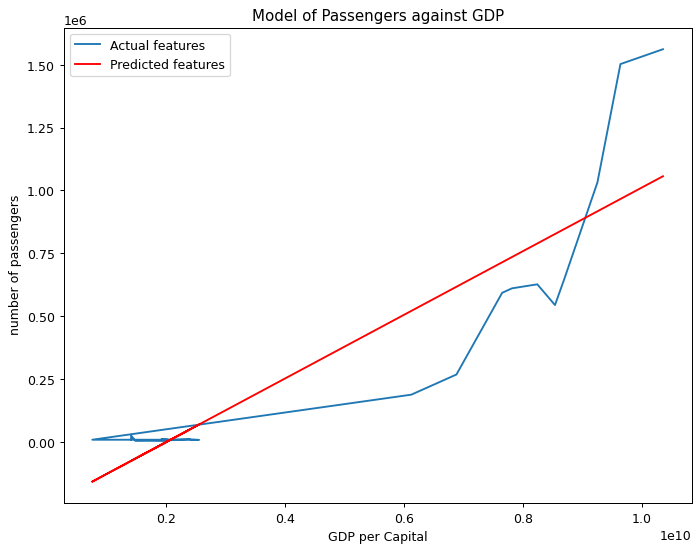

predicted number passengers are:  [1092375.92130646]


In [46]:

#model beween Passengers and GDP
X3 = np.array(Rwanda["GDP Values"]).reshape(-1,1)
y3 = np.array(Rwanda["passengers"])        #.reshape(-1,1)

model = LinearRegression()
model.fit(X3,y3)
model = LinearRegression().fit(X3,y3)
r_square = model.score(X3,y3)
print('r_square:', r_square)

y_predicted = model.intercept_ + model.coef_ * X3

plt.plot(X3,y3,label='Actual features')
plt.plot(X3,y_predicted,label='Predicted features',color='r')
plt.xlabel(' GDP per Capital ')
plt.ylabel(' number of passengers')
plt.title('Model of Passengers against GDP')

plt.legend()
plt.show()
predicted_rate_2025 = model.predict([[1.06389266e+10]])
print('predicted number passengers are: ',predicted_rate_2025)   



In [45]:

tset, pval =stats.ttest_ind(Rwanda["GDP Values"],Rwanda["passengers"] )

print('pval :', pval)
if  pval < 0.05:    
    print("we are rejecting null hypothesis,and accepting the alternative hypothesis")        #taking decision 
else:
    print("we are accepting null hypothesis,and rejecting the alternative hypothesis")
    

pval : 3.936095300708973e-08
we are rejecting null hypothesis,and accepting the alternative hypothesis
